<a href="https://colab.research.google.com/github/abhisek247767/price_presiction_ML/blob/main/mobileprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from google.colab import files
uploaded = files.upload()

Saving mobile_test.csv to mobile_test (2).csv


In [68]:
from google.colab import files
uploaded = files.upload()

Saving mobile_train.csv to mobile_train (2).csv


In [94]:
data_train=pd.read_csv(r'mobile_train.csv')
data_test=pd.read_csv(r'mobile_test.csv')

In [70]:
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [71]:
#Exploritory data analysis
print(data_train.shape)
print(data_test.shape)


(2000, 21)
(1000, 21)


In [72]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [73]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [74]:
data_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [75]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [76]:
data_test.duplicated().sum()

0

In [77]:
data_train.duplicated().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


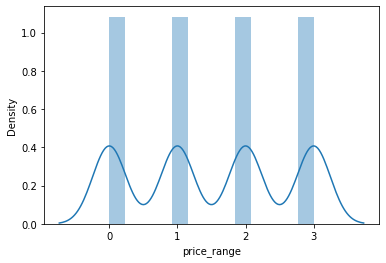

In [78]:
sns.distplot(data_train['price_range']) # distribution is ok... means 0 or low cost mobile is there,1 or mid cost mobile has same densitry or...

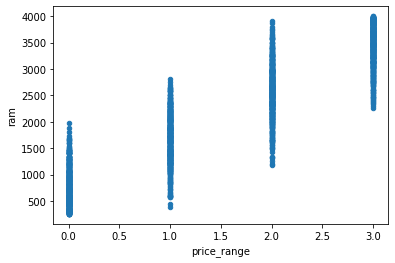

In [79]:
data_train.plot(x='price_range',y='ram',kind='scatter') # ram is effect on price ## lower cost mobile  0 ram i 2000b or 2gb like that
plt.show()

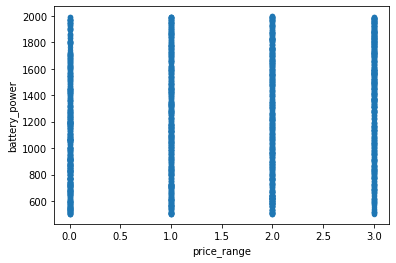

In [80]:
data_train.plot(x='price_range',y='battery_power',kind='scatter') # battery power not effect on price
plt.show()

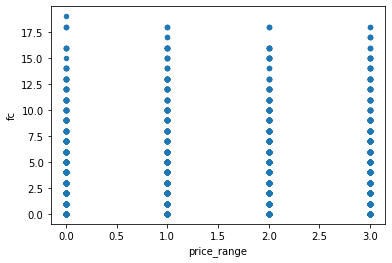

In [81]:
data_train.plot(x='price_range',y='fc',kind='scatter') # fc or front camera not affecting on price range 
plt.show()

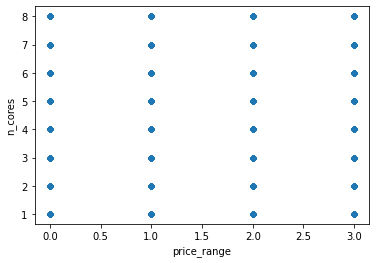

In [82]:
data_train.plot(x='price_range',y='n_cores',kind='scatter') # n_cores not affecting on price range 
plt.show()

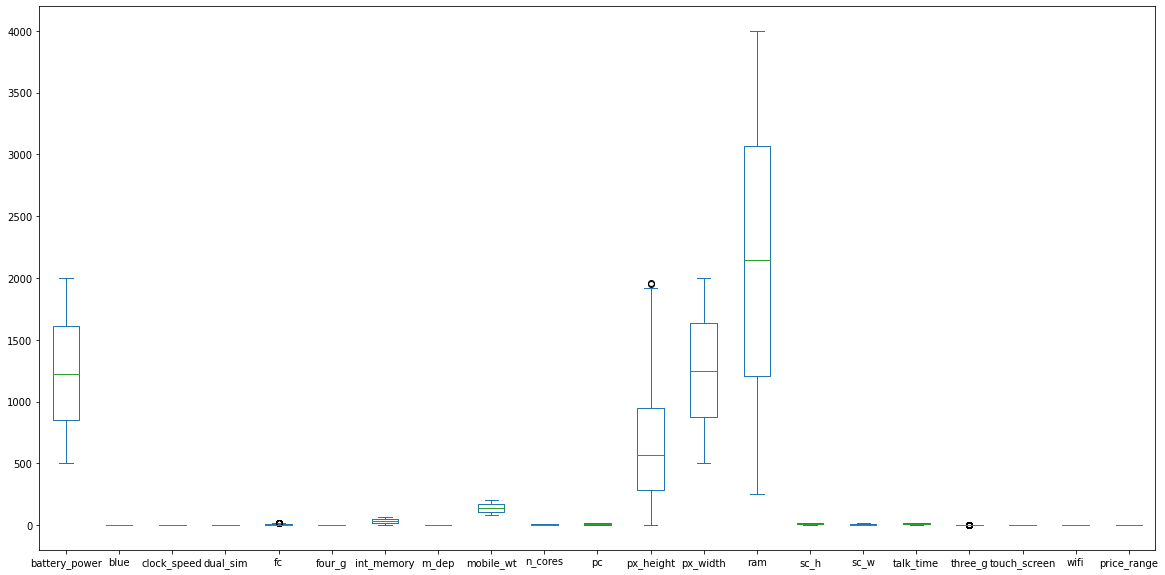

In [83]:
data_train.plot(kind='box',figsize=(20,10)) #there is not much more outlier so no need to remove it.. px-height col has one outlier and fc has one outlier and three_g_touch has outlier
plt.show() # outlier is abnormal data points means 1,2,3,4,1000000..here 1000000 is outlier like that which effect out model

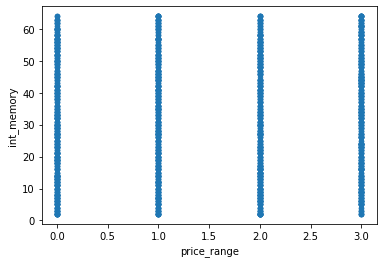

In [84]:
data_train.plot(x='price_range',y='int_memory',kind='scatter') # n_cores not affecting on price range 
plt.show()

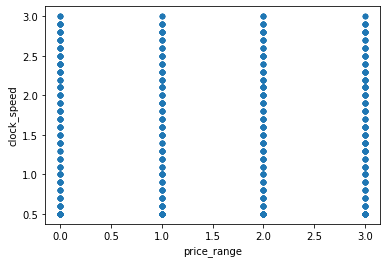

In [85]:
data_train.plot(x='price_range',y='clock_speed',kind='scatter') # n_cores not affecting on price range 
plt.show()

In [97]:
X=data_train.drop('price_range',axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [100]:
data_test.shape

(1000, 20)

In [98]:
data_test=data_test.drop('id',axis=1)
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [88]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [99]:
X_std=std.fit_transform(X)
data_test_std=std.transform(data_test)
X_std

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [101]:
data_test_std

array([[-0.44505984,  1.0100505 ,  0.34046327, ..., -1.78686097,
         0.99401789, -1.01409939],
       [-0.90487356,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.29403758,  1.0100505 ,  1.56625363, ..., -1.78686097,
         0.99401789,  0.98609664],
       ...,
       [-0.12182446, -0.9900495 , -0.14985287, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 0.67032987,  1.0100505 , -1.2530642 , ..., -1.78686097,
         0.99401789, -1.01409939],
       [ 0.07166151,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664]])

In [102]:
Y=data_train['price_range']

In [103]:
#Training The Model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_std,Y)

DecisionTreeClassifier()

In [104]:
dt.predict(data_test_std) #battery power 832 means at price range 3 like that every col we get some price range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 0, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1,

In [105]:
dt.score(X_std,Y)

1.0

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_std,Y)
KNeighborsClassifier()
knn.predict(data_test_std)

array([2, 3, 1, 3, 2, 1, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 1, 1, 3, 1, 1, 3,
       0, 0, 3, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 3, 1, 2, 2, 3, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 1, 3, 1, 3, 0, 1, 1, 1, 2, 0, 2, 3, 1, 2, 0, 2, 1,
       1, 1, 2, 3, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 1, 2, 1, 1, 2, 2,
       3, 0, 1, 3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 3, 2, 2, 0, 3, 2, 0, 2, 1, 3, 3, 2, 2, 2, 2, 1, 3, 1, 1, 2,
       1, 1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3, 0, 1, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3,
       1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 0, 2, 0,
       0, 2, 1, 2, 3, 2, 1, 1, 2, 0, 0, 2, 2, 3, 0, 3, 3, 1, 3, 1, 0, 2,
       2, 3, 3, 0, 0, 0, 2, 3, 1, 0, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 3,
       2, 1, 1, 2, 3, 0, 3, 1, 2, 0, 1, 0, 1, 2, 1,

In [107]:
knn.score(X_std,Y)

0.699

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_std,Y)
LogisticRegression()
lr.predict(data_test_std)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
lr.score(X_std,Y)

In [109]:
#test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


In [110]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


In [112]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [113]:
#training
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
DecisionTreeClassifier()
Y_pred=dt.predict(X_test)

In [114]:
Y_pred

array([0, 0, 1, 0, 3, 2, 1, 1, 1, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 2, 0, 1, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       1, 1, 2, 0, 1, 1, 2, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 0, 1, 2, 2, 3, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 2, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 0, 2, 1, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 1, 1, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 3, 3, 1, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

In [118]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [119]:
from sklearn.metrics import accuracy_score
dt_ac=accuracy_score(Y_test,Y_pred)
dt_ac

0.84

In [120]:
X_train_std=std.fit_transform(X_train)

X_test_std=std.transform(X_test)
X_test_std

array([[-0.49109398, -0.99128795,  1.33165174, ...,  0.56965192,
        -1.02020406, -1.01384584],
       [-0.56454768,  1.00878862,  0.35176429, ...,  0.56965192,
         0.98019606, -1.01384584],
       [-1.46665102,  1.00878862, -1.24055283, ...,  0.56965192,
         0.98019606,  0.98634324],
       ...,
       [ 1.45083838,  1.00878862,  0.35176429, ...,  0.56965192,
        -1.02020406, -1.01384584],
       [ 1.65054065, -0.99128795, -1.24055283, ...,  0.56965192,
         0.98019606, -1.01384584],
       [-1.33810703,  1.00878862, -0.99558096, ...,  0.56965192,
        -1.02020406, -1.01384584]])

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_std,Y_train)
KNeighborsClassifier()
Y_pred=knn.predict(X_test_std)
Y_pred

array([0, 1, 1, 0, 1, 1, 0, 2, 1, 3, 0, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 2,
       1, 3, 3, 2, 2, 1, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 3, 2, 2, 3, 1, 2, 0,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 3, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 3, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 0, 1, 0, 0, 2, 3, 1, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 1, 0, 1, 3,
       2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 3,
       2, 0, 3, 2, 0, 3, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 3, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 1, 0, 3, 2, 1, 0, 1, 3, 3, 1, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 0, 3, 2, 2, 0, 0, 1, 1, 3, 1, 2, 1, 0, 1, 0, 1, 2,
       2, 2, 2, 0, 1, 0, 3, 0, 0, 2, 2, 3, 0, 2, 1, 2, 3, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 3, 1, 3, 0, 0, 2, 3, 3, 3, 0,

In [122]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [123]:
knn_ac=accuracy_score(Y_test,Y_pred)
knn_ac

0.5225

In [125]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_std,Y_train)

Y_pred=lr.predict(X_test_std)
Y_pred

array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2,

In [126]:
lr_ac=accuracy_score(Y_test,Y_pred)
lr_ac

0.96

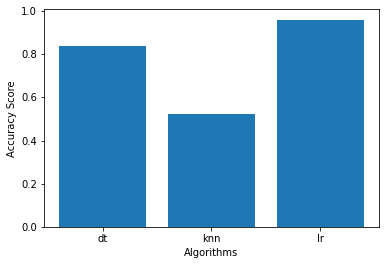

In [127]:
plt.bar(x=['dt','knn','lr'],height=[dt_ac,knn_ac,lr_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
## Hurrah !!!East and west our linear Regresiion is best